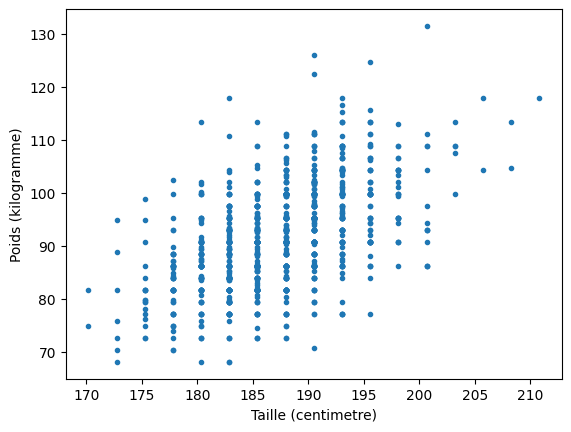

,Name,Team,Position,TAILLE,POIDS,Age
0,Adam_Donachie,BAL,Catcher,187.96,81.646627,22.99
1,Paul_Bako,BAL,Catcher,187.96,97.522360,34.69
2,Ramon_Hernandez,BAL,Catcher,182.88,95.254398,30.78
3,Kevin_Millar,BAL,First_Baseman,182.88,95.254398,35.43
4,Chris_Gomez,BAL,First_Baseman,185.42,85.275366,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,185.42,86.182550,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,187.96,81.646627,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,190.50,92.986436,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,190.50,86.182550,31.01


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

df = pd.read_csv("baseball_players.csv",sep=",")

df.rename(columns={"Height(inches)":"TAILLE","Weight(pounds)":"POIDS"},inplace=True)
df['TAILLE'] = df['TAILLE']*2.54
df['POIDS'] = df['POIDS']*0.45359237

plt.plot(df['TAILLE'], df['POIDS'], '.')
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

df

In [69]:
cov = df[['TAILLE','POIDS']].cov()
cov

,TAILLE,POIDS
TAILLE,34.301855,29.667609
POIDS,29.667609,90.660487


In [70]:
a = df[['TAILLE','POIDS']].cov()['TAILLE']['POIDS']/df[['TAILLE','POIDS']].cov()['TAILLE']['TAILLE']
b = df['POIDS'].mean() - a * df['TAILLE'].mean()
a,b

(np.float64(0.8648981014097074), np.float64(-70.41653889800001))

In [71]:
df['Modele Poids vs Taille'] = a * df['TAILLE'] + b
df[['POIDS', 'TAILLE', 'Modele Poids vs Taille']]

,POIDS,TAILLE,Modele Poids vs Taille
0,81.646627,187.96,92.149708
1,97.522360,187.96,92.149708
2,95.254398,182.88,87.756026
3,95.254398,182.88,87.756026
4,85.275366,185.42,89.952867
...,...,...,...
1029,86.182550,185.42,89.952867
1030,81.646627,187.96,92.149708
1031,92.986436,190.50,94.346549
1032,86.182550,190.50,94.346549


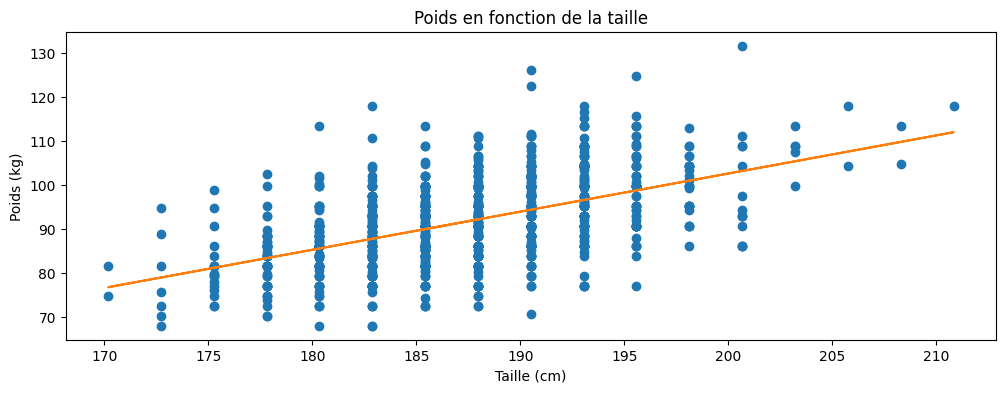

Poids d'un joueur de 178 cm : 83.53532315292789 kg


In [72]:
plt.figure(figsize=(12,4))
plt.plot(df['TAILLE'], df['POIDS'], 'o')
plt.plot(df['TAILLE'], df['Modele Poids vs Taille'], '-')
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.title('Poids en fonction de la taille')
plt.show()

print(f"Poids d'un joueur de 178 cm : {a*178+b} kg")

In [73]:
aa = df[['TAILLE','POIDS']].cov()['TAILLE']['POIDS']/df[['TAILLE','POIDS']].cov()['POIDS']['POIDS']
bb = df['TAILLE'].mean() - aa * df['POIDS'].mean()
aa,bb

(np.float64(0.32723857918237736), np.float64(157.25379632233168))

In [74]:
df['Modele Taille vs poids'] = aa * df['POIDS'] + bb
df[['POIDS', 'TAILLE', 'Modele Poids vs Taille', 'Modele Taille vs poids']]

,POIDS,TAILLE,Modele Poids vs Taille,Modele Taille vs poids
0,81.646627,187.96,92.149708,183.971722
1,97.522360,187.96,92.149708,189.166875
2,95.254398,182.88,87.756026,188.424710
3,95.254398,182.88,87.756026,188.424710
4,85.275366,185.42,89.952867,185.159186
...,...,...,...,...
1029,86.182550,185.42,89.952867,185.456052
1030,81.646627,187.96,92.149708,183.971722
1031,92.986436,190.50,94.346549,187.682545
1032,86.182550,190.50,94.346549,185.456052


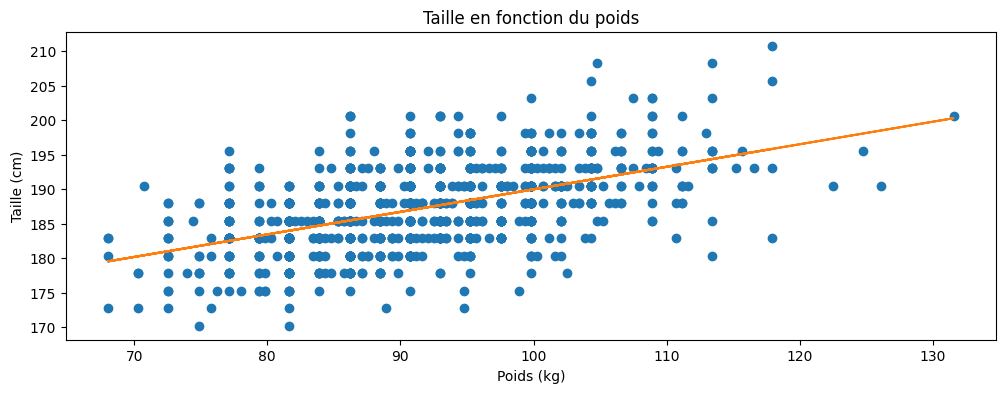

Taille d'un joueur de 63 kg : 177.86982681082145 kg


In [75]:
plt.figure(figsize=(12,4))
plt.plot(df['POIDS'], df['TAILLE'], 'o')
plt.plot(df['POIDS'], df['Modele Taille vs poids'], '-')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.title('Taille en fonction du poids')
plt.show()

print(f"Taille d'un joueur de 63 kg : {aa*63+bb} kg")

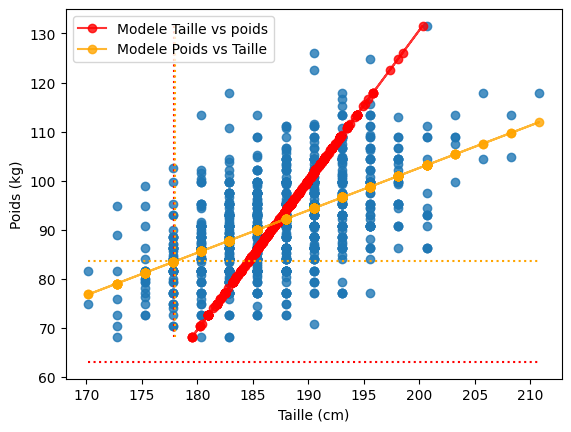

In [76]:
plt.plot(df['TAILLE'],df['POIDS'],'o',alpha=0.8)

plt.plot(df['Modele Taille vs poids'], df['POIDS'], '-o', alpha=0.8, color='red', label='Modele Taille vs poids')
plt.hlines(y=63, xmin=np.min(df['TAILLE']), xmax=np.max(df['TAILLE']), color='red', linestyles='dotted')
plt.vlines(x=aa*63+bb, ymin=np.min(df['POIDS']), ymax=np.max(df['POIDS']), color='red', linestyles='dotted')

plt.plot(df['TAILLE'], df['Modele Poids vs Taille'], '-o', alpha=0.8, color='orange', label='Modele Poids vs Taille')
plt.vlines(x=178, ymin=np.min(df['POIDS']), ymax=np.max(df['POIDS']), color='orange', linestyles='dotted')
plt.hlines(y=a*178+b, xmin=np.min(df['TAILLE']), xmax=np.max(df['TAILLE']), color='orange', linestyles='dotted')

plt.ylabel('Poids (kg)')
plt.xlabel('Taille (cm)')
plt.legend()
plt.show()